**Importing libraries**

In [ ]:
!pip install scikit-plot
!pip install scikit-learn
!pip install contractions
!pip install pycontractions
!pip install tweet-preprocessor

import re
import nltk
import time
import string
import numpy as np
import pandas as pd
import contractions
import seaborn as sns
from nltk import pos_tag
import preprocessor as p
import scikitplot as skplt
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from sklearn import preprocessing
from nltk.stem import PorterStemmer
from sklearn.metrics import f1_score
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

     |████████████████████████████████| 284 kB 5.1 MB/s 
     |████████████████████████████████| 321 kB 51.5 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85450 sha256=dbb5c1f8beb616137b8991e90e3be359b647063efcd8e21f014ddbce8778566d
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick
  ERROR: Failed building wheel for language-check
  Running setup.py clean for language-check
Failed to build language-check
    Running setup.py install for language-check ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-dsy_ru4j/language-check_d3269c9eab994c7c8236fb7a831aa0c2/setup.py'"'"'; __file__='"'"'/tmp/pip-install-dsy_ru4j/language-check_d3269c9eab994c7c8236fb7a831aa0c2/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path

True

**Reading CSV**

In [ ]:
tweetDF = pd.read_csv('labeled_data.csv', index_col=False)
tweetDF.tweet.head()

0    !!! RT @mayasolovely: As a woman you shouldn't...
1    !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3    !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4    !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
Name: tweet, dtype: object

**Lower Casing**

In [ ]:
tweetDF['tweet'] = [str(i).lower() for i in tweetDF['tweet']]
tweetDF.tweet.head()

0    !!! rt @mayasolovely: as a woman you shouldn't...
1    !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3    !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4    !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
Name: tweet, dtype: object

**Expanding Contractions**

In [ ]:
tweetDF['tweet'] = tweetDF['tweet'].apply(lambda tweet: [contractions.fix(word) for word in tweet.split()])
tweetDF.tweet.head()

0    [!!!, rt, @mayasolovely:, as, a, woman, you, s...
1    [!!!!!, rt, @mleew17:, boy, dats, cold...tyga,...
2    [!!!!!!!, rt, @urkindofbrand, dawg!!!!, rt, @8...
3    [!!!!!!!!!, rt, @c_g_anderson:, @viva_based, s...
4    [!!!!!!!!!!!!!, rt, @shenikaroberts:, the, shi...
Name: tweet, dtype: object

**Detokenization**

In [ ]:
tweetDF['tweet']=tweetDF['tweet'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
tweetDF.tweet.head()

0    !!! rt @mayasolovely: as a woman you should no...
1    !!!!! rt @mleew17: boy dats cold...tyga dwn ba...
2    !!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...
3    !!!!!!!!! rt @c_g_anderson: @viva_based she lo...
4    !!!!!!!!!!!!! rt @shenikaroberts: the shit you...
Name: tweet, dtype: object

**Removing Special Characters**

In [ ]:
def cleaning(tweet):
    tweet = tweet.rstrip()
    tweet = tweet.lstrip()
    # remove the retweet text "RT"
    tweet2 = re.sub(r'^rt[\s]+', '', tweet)
    tweet2 = re.sub('rt', '', tweet2)
    # remove hyperlinks
    tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
    # remove all special characters
    tweet2 = re.sub(r'[^a-zA-Z0-9 ]', '', tweet2)
    #remove extra white spaces
    tweet2 = re.sub(' +', ' ', tweet2)
    tweet2 = tweet2.rstrip()
    tweet2 = tweet2.lstrip()
    tweeet = tweet2.split(":")
    if len(tweeet) == 3:
        return (tweeet[2])
    if len(tweeet) == 2:
        return (tweeet[1])
    else:
        return (tweeet[0])

**Stemming and Lemmatization**

In [ ]:
def preprocessTweets(row):
    lemmatizer = WordNetLemmatizer()
    porter = PorterStemmer() 
    text = row['tweet']
    text = p.clean(text)
    text = cleaning(text)

    token_words=word_tokenize(text)
    token_words
    lem_sentence=[]
    for word in token_words:
        lem_sentence.append(lemmatizer.lemmatize(word))
        lem_sentence.append(" ")
    text = "".join(lem_sentence)

    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    text = "".join(stem_sentence)
    return text

In [ ]:
tweetDF['cleanTweet'] = tweetDF.apply(preprocessTweets, axis=1)
# tokenizing again for removing stopwords
tweetDF['cleanTweet'] = tweetDF.cleanTweet.apply(word_tokenize)
tweetDF.cleanTweet.head()

0    [a, a, woman, you, should, not, complain, abou...
1    [boy, dat, coldtyga, dwn, bad, for, cuffin, da...
2    [dawg, you, ever, fuck, a, bitch, and, she, st...
3                         [she, look, like, a, tranni]
4    [the, shit, you, hear, about, me, might, be, t...
Name: cleanTweet, dtype: object

**Removing Stopwords**

In [ ]:
stop_words = set(stopwords.words('english'))
tweetDF['cleanTweet'] = tweetDF['cleanTweet'].apply(lambda cleanTweet: ' '.join([word for word in cleanTweet if word not in (stop_words)]))
tweetDF.cleanTweet.head()

0    woman complain clean hous amp man alway take t...
1     boy dat coldtyga dwn bad cuffin dat hoe st place
2             dawg ever fuck bitch sta cri confus shit
3                                     look like tranni
4       shit hear might true might faker bitch told ya
Name: cleanTweet, dtype: object

**Tokenization**

In [ ]:
tweetDF['cleanTweet'] = tweetDF.cleanTweet.apply(word_tokenize)
tweetDF.cleanTweet.head()

0    [woman, complain, clean, hous, amp, man, alway...
1    [boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...
2    [dawg, ever, fuck, bitch, sta, cri, confus, shit]
3                                 [look, like, tranni]
4    [shit, hear, might, true, might, faker, bitch,...
Name: cleanTweet, dtype: object

In [ ]:
tweetDF.cleanTweet[10]

['keek',
 'bitch',
 'curv',
 'everyon',
 'lol',
 'walk',
 'convers',
 'like',
 'thi',
 'smh']

**Processed tweets with sentiments**

In [ ]:
shape = tweetDF.shape
twt = tweetDF['cleanTweet'].values
sentiment = tweetDF['class'].values
twtItems = [(twt[i] , sentiment[i]) for i in range(shape[0])]
labels = [label for twtItem, label in twtItems]
twtCollection = [" ".join(twtItem) for twtItem, label in twtItems]
print(twtCollection)

['woman complain clean hous amp man alway take trash', 'boy dat coldtyga dwn bad cuffin dat hoe st place', 'dawg ever fuck bitch sta cri confus shit', 'look like tranni', 'shit hear might true might faker bitch told ya', 'shit blow meclaim faith somebodi still fuck hoe', 'sit hate anoth bitch got much shit go', 'becaus I tire big bitch come u skinni girl', 'amp might get ya bitch back amp', 'hobbi includ fight mariam bitch', 'keek bitch curv everyon lol walk convers like thi smh', 'murda gang bitch gang land', 'hoe smoke loser yeago ig', 'bad bitch onli thing like', 'bitch get', 'bitch nigga miss', 'bitch plz whatev', 'bitch love', 'bitch get cut everyday b', 'black bottl amp bad bitch', 'broke bitch tell noth', 'cancel bitch like nino', 'see hoe chang', 'fuck bitch even suck dick kermit video bout fuck ig', 'got ya bitch tip toe hardwood floor', 'pussi lip like heaven door', 'hoe hit', 'met pussi ocean dr gave pussi pill', 'need trippi bitch fuck hennessi', 'spend money want bitch bus

**Splitting processed dataset for training**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(twtCollection, labels)

**Vectorization**

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
x_train_features = vectorizer.fit_transform(x_train)
x_test_features = vectorizer.transform(x_test)

# **Naive Bayes Model From Scratch**



In [ ]:
x_train_new = [word_tokenize(t) for t in x_train]
x_test_new = [word_tokenize(t) for t in x_test]

In [ ]:
label_encoder = preprocessing.LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

features = vectorizer.get_feature_names()[50:1500]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def count_word_freq(sentence):
    word_dict = dict()
    for word in sentence:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [ ]:
def convert_to_vector_count(x_data, features):
    vector_data = np.zeros((len(x_data), len(features)))
    for i in range(len(x_data)):
        current_doc = x_data[i]
        word_dict = count_word_freq(current_doc)
        for j in range(len(features)):
            if features[j] in word_dict.keys():
                vector_data[i][j] = word_dict[features[j]]
            else:
                continue
    return vector_data 

In [ ]:
x_train_vector = convert_to_vector_count(x_train_new , features)
x_test_vector = convert_to_vector_count(x_test_new , features)

In [ ]:
def get_total_count(feature_count_dict, current_class, index):
    return feature_count_dict[current_class][features[index]]

In [ ]:
def get_class_total_count(feature_count_dict, current_class):
    return feature_count_dict[current_class]['total']

In [ ]:
def calculate_posterior_probability(feature_count_dict, doc, current_class):
    liklihood_probability = []
    
    for i in range(len(doc)):
        if doc[i]!=0:
            token_count = get_total_count(feature_count_dict, current_class, i)
            class_total_count = get_class_total_count(feature_count_dict, current_class)
            token_probability = np.log((token_count + 1) / (class_total_count + len(doc)))
            liklihood_probability.append(token_probability)
    return sum(liklihood_probability)

In [ ]:
def train(x_train, target_value):
    feature_count_dict = dict()
    for i in range(3):
        class_document = x_train[target_value == i]
        
        feature_count_dict[i] = dict()
        feature_count_dict[i]['total'] = 0
        
        for j in range(len(features)):
            feature_count_dict[i][features[j]] = class_document[:, j].sum()
            feature_count_dict[i]['total'] += feature_count_dict[i][features[j]]     
    return feature_count_dict

In [ ]:
def predict(x_test, feature_count_dict):
    y_pred = []
    for doc in x_test:
        unique_classes = feature_count_dict.keys()
        higher_prob, higher_prob_class, temp = -1000, -1, True # temp - for first running
        for current_class in unique_classes:
            current_class_probability = calculate_posterior_probability(feature_count_dict, doc, current_class)
            if (temp or current_class_probability  > higher_prob):
                higher_prob = current_class_probability
                higher_prob_class = current_class
            temp = False
        y_pred.append(higher_prob_class)
    return y_pred

In [ ]:
print("Training Starts -------------------")
feature_count_dict = train(x_train_vector, y_train)

Training Starts -------------------


In [ ]:
print("Prediction Starts -------------------")
y_pred = predict(x_test_vector, feature_count_dict)
print(y_pred)

Prediction Starts -------------------
[1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1

### **Classification Report for Naive Bayes Model (from scratch)**

In [ ]:
print("Classification Report : \n")
print(classification_report(y_test, y_pred))

print("\n")
print("Accuracy", accuracy_score(y_test, y_pred))

print("\n")
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(y_test, y_pred, average='weighted'))
print("recall_score", recall_score(y_test, y_pred, average='weighted'))
print("f1_score", f1_score(y_test, y_pred, average='weighted'))

Classification Report : 

              precision    recall  f1-score   support

           0       0.38      0.24      0.30       362
           1       0.87      0.97      0.92      4772
           2       0.87      0.54      0.67      1062

    accuracy                           0.85      6196
   macro avg       0.71      0.58      0.63      6196
weighted avg       0.84      0.85      0.84      6196



Accuracy 0.8520012911555842


Weighted Averaged validation metrics
precision_score 0.8412571333138258
recall_score 0.8520012911555842
f1_score 0.8375244537674887


**Detokenization**

In [ ]:
tweetDF['cleanTweet']=tweetDF['cleanTweet'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

**Bag of Words**

In [ ]:
#Bag-of-words
#Each row in matrix M contains the frequency of tokens(words) in the document D(i)
bow_vectorizer = CountVectorizer(max_df=0.90 ,min_df=2 , max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(tweetDF['cleanTweet']) # tokenize and build vocabulary
bow.shape

(24783, 1000)

**Splitting data for comparision**

In [ ]:
tweetDF=tweetDF.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(bow, tweetDF['class'], test_size=0.2, random_state=69)

print("X_train_shape : ",X_train.shape)
print("X_test_shape : ",X_test.shape)
print("y_train_shape : ",y_train.shape)
print("y_test_shape : ",y_test.shape)

ml_default_performance_metrics_df = pd.DataFrame(columns=['accuracy','F1-score','training-time'], index=['MultinomialNB', 'RandomForestClassifier', 'LinearSVC', 'BernoulliNB'])

X_train_shape :  (19826, 1000)
X_test_shape :  (4957, 1000)
y_train_shape :  (19826,)
y_test_shape :  (4957,)


# **Multinomial Naive Bayes**

Using Multinomial Naive Bayes Algorithm:


              precision    recall  f1-score   support

           0       0.41      0.21      0.28       278
           1       0.91      0.95      0.93      3851
           2       0.82      0.76      0.79       828

    accuracy                           0.88      4957
   macro avg       0.71      0.64      0.66      4957
weighted avg       0.86      0.88      0.87      4957



accuracy_score 0.879765987492435


Weighted Averaged validation metrics
precision_score 0.8649975236400691
recall_score 0.879765987492435
f1_score 0.8700049026678528




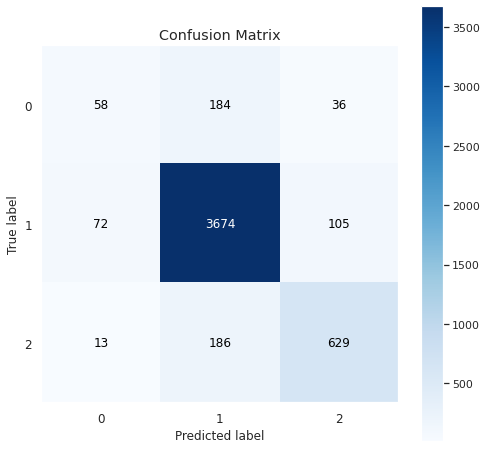

In [ ]:
from sklearn.naive_bayes import MultinomialNB
   
print("Using Multinomial Naive Bayes Algorithm:")
print("\n")
start_time = time.time()

MultinomialNB_obj = MultinomialNB()
MultinomialNB_obj.fit(X_train, y_train)
predictions = MultinomialNB_obj.predict(X_test)
print(classification_report(y_test, predictions))

print("\n")
print("accuracy_score", accuracy_score(y_test, predictions))

print("\n")
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(y_test, predictions, average='weighted'))
print("recall_score", recall_score(y_test, predictions, average='weighted'))
print("f1_score", f1_score(y_test, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['MultinomialNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['MultinomialNB']['accuracy'] = accuracy_score(y_test, predictions)
ml_default_performance_metrics_df.loc['MultinomialNB']['F1-score'] = f1_score(y_test, predictions, average='weighted')

print("\n")
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, predictions)

# **Random Forest Classifier**

Using Random Forest Classifier:


              precision    recall  f1-score   support

           0       0.39      0.22      0.28       278
           1       0.93      0.93      0.93      3851
           2       0.78      0.88      0.83       828

    accuracy                           0.89      4957
   macro avg       0.70      0.68      0.68      4957
weighted avg       0.88      0.89      0.88      4957



accuracy_score 0.8856163001815615


Weighted Averaged validation metrics
precision_score 0.875887091870167
recall_score 0.8856163001815615
f1_score 0.8789082035877874




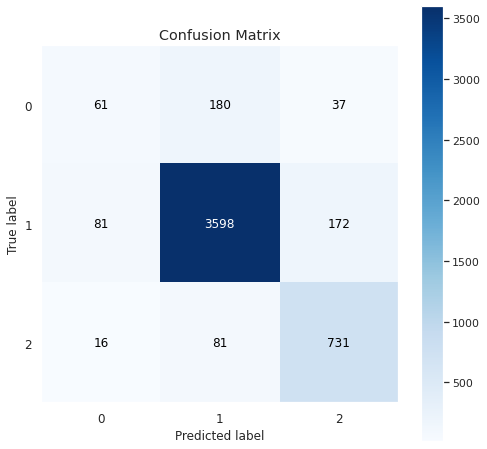

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
    
print("Using Random Forest Classifier:")
print("\n")

RandomForestClassifier_obj = RandomForestClassifier(n_estimators = 10, random_state=42)
RandomForestClassifier_obj.fit(X_train, y_train)
predictions = RandomForestClassifier_obj.predict(X_test)
print(classification_report(y_test, predictions))

print("\n")
print("accuracy_score", accuracy_score(y_test, predictions))

print("\n")
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(y_test, predictions, average='weighted'))
print("recall_score", recall_score(y_test, predictions, average='weighted'))
print("f1_score", f1_score(y_test, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['RandomForestClassifier']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['RandomForestClassifier']['accuracy'] = accuracy_score(y_test, predictions)
ml_default_performance_metrics_df.loc['RandomForestClassifier']['F1-score'] = f1_score(y_test, predictions, average='weighted')

print("\n")
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, predictions)

# **Linear SVC**

Using LinearSVC Algorithm:


              precision    recall  f1-score   support

           0       0.42      0.23      0.30       278
           1       0.93      0.94      0.94      3851
           2       0.80      0.88      0.84       828

    accuracy                           0.89      4957
   macro avg       0.72      0.68      0.69      4957
weighted avg       0.88      0.89      0.88      4957



accuracy_score 0.8908614081097438


Weighted Averaged validation metrics
precision_score 0.8801520921645181
recall_score 0.8908614081097438
f1_score 0.8836815902591425




/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


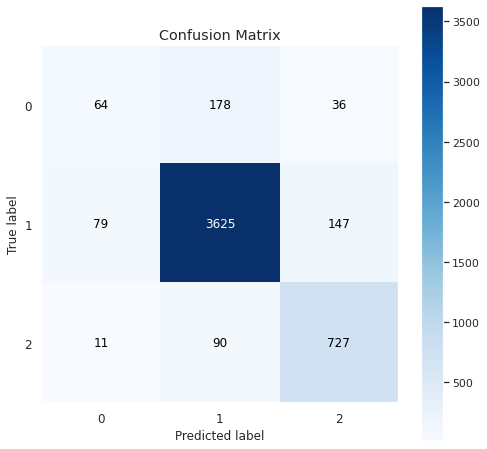

In [ ]:
from sklearn.svm import LinearSVC

start_time = time.time()
    
print("Using LinearSVC Algorithm:")
print("\n")

LinearSVC_obj = LinearSVC(multi_class='ovr', random_state=42)
LinearSVC_obj.fit(X_train, y_train)
predictions = LinearSVC_obj.predict(X_test)
print(classification_report(y_test, predictions))

print("\n")
print("accuracy_score", accuracy_score(y_test, predictions))

print("\n")
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(y_test, predictions, average='weighted'))
print("recall_score", recall_score(y_test, predictions, average='weighted'))
print("f1_score", f1_score(y_test, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['LinearSVC']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['LinearSVC']['accuracy'] = accuracy_score(y_test, predictions)
ml_default_performance_metrics_df.loc['LinearSVC']['F1-score'] = f1_score(y_test, predictions, average='weighted')

print("\n")
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, predictions)

# **Bernoulli Naive Bayes**

Using Bernoulli Naive Bayes Algorithm:


              precision    recall  f1-score   support

           0       0.38      0.22      0.28       278
           1       0.92      0.95      0.93      3851
           2       0.81      0.79      0.80       828

    accuracy                           0.88      4957
   macro avg       0.70      0.65      0.67      4957
weighted avg       0.87      0.88      0.87      4957



accuracy_score 0.8799677224127497


Weighted Averaged validation metrics
precision_score 0.8671830842023986
recall_score 0.8799677224127497
f1_score 0.8722227330000591




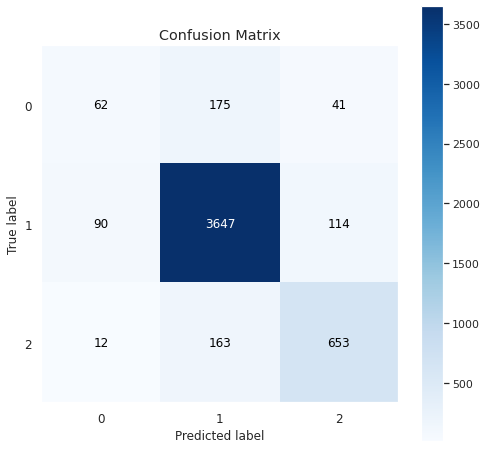

In [ ]:
from sklearn.naive_bayes import BernoulliNB

start_time = time.time()
    
print("Using Bernoulli Naive Bayes Algorithm:")
print("\n")

BernoulliNB_obj = BernoulliNB()
BernoulliNB_obj.fit(X_train, y_train)
predictions = BernoulliNB_obj.predict(X_test)
print(classification_report(y_test, predictions))

print("\n")
print("accuracy_score", accuracy_score(y_test, predictions))

print("\n")
print("Weighted Averaged validation metrics")
print("precision_score", precision_score(y_test, predictions, average='weighted'))
print("recall_score", recall_score(y_test, predictions, average='weighted'))
print("f1_score", f1_score(y_test, predictions, average='weighted'))


ml_default_performance_metrics_df.loc['BernoulliNB']['training-time'] = time.time() - start_time
ml_default_performance_metrics_df.loc['BernoulliNB']['accuracy'] = accuracy_score(y_test, predictions)
ml_default_performance_metrics_df.loc['BernoulliNB']['F1-score'] = f1_score(y_test, predictions, average='weighted')

print("\n")
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, predictions)

# **References**

https://github.com/tigju/Naive-Bayes-Classifier-from-scratch/blob/main/naive_bayes.ipynb

https://medium.com/@annabiancajones/sentiment-analysis-of-reviews-text-pre-processing-6359343784fb

https://www.cs.rhodes.edu/~kirlinp/courses/ai/f18/projects/proj3/naive-bayes-log-probs.pdf

https://www.kaggle.com/kerneler/starter-hate-speech-and-offensive-5d28e899-0

https://medium.datadriveninvestor.com/tf-idf-in-natural-language-processing-8db8ef4a7736

https://stackabuse.com/python-for-nlp-creating-bag-of-words-model-from-scratch/

https://www.analyticsvidhya.com/blog/2021/08/a-friendly-guide-to-nlp-bag-of-words-with-python-example/

https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/

https://towardsdatascience.com/sentiment-analysis-introduction-to-naive-bayes-algorithm-96831d77ac91

https://predictivehacks.com/naive-bayes-classification-in-nlp-tasks-from-scratch/

https://medium.com/nerd-for-tech/illustrated-naive-bayes-implementation-from-scratch-for-sentiment-analysis-63c4bcab6053

https://github.com/kunalrawat2000/Sentiment-Analysis

https://stackoverflow.com/questions/33098040/how-to-use-word-tokenize-in-data-frame

https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe

https://stackoverflow.com/questions/22245171/how-to-lowercase-a-pandas-dataframe-string-column-if-it-has-missing-values

https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python